In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [89]:
from dateutil.relativedelta import relativedelta

stock = "AAPL"
end = datetime.today()
# go back 12 months
go_back = 24
start = end - relativedelta(months=go_back)

In [90]:
close = pd.DataFrame()
close['Price'] = yf.download(stock, start=start, end=end)['Close']

[*********************100%%**********************]  1 of 1 completed


In [91]:
close.head()

,Price
Date,
2022-01-03,182.009995
2022-01-04,179.699997
2022-01-05,174.919998
2022-01-06,172.000000
2022-01-07,172.169998


In [92]:
close.describe()

,Price
count,501.000000
mean,163.674351
std,17.703835
min,125.019997
25%,149.350006
50%,165.020004
75%,176.279999
max,198.110001


In [93]:
# check for missing values
close.isna().sum()

Price    0
dtype: int64

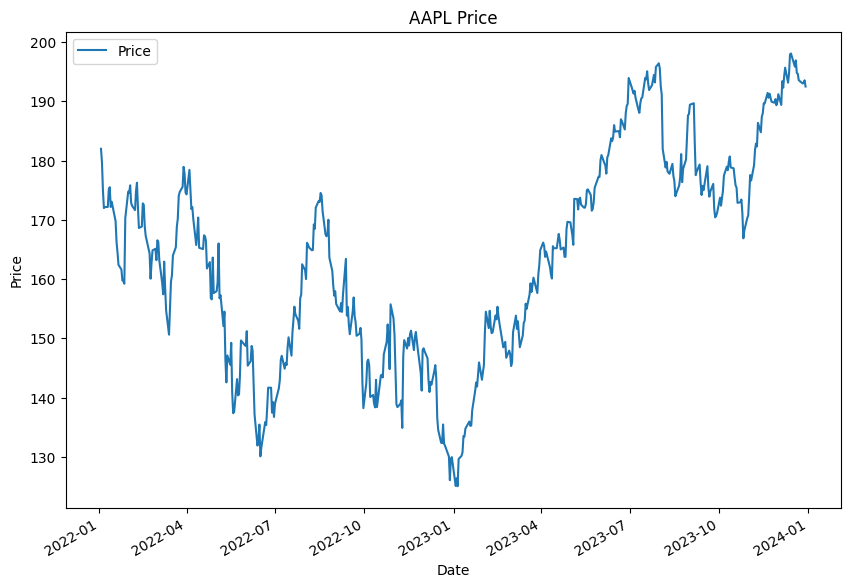

In [94]:
# plot the data
close.plot(figsize=(10, 7), title=f"{stock} Price")
plt.ylabel("Price")
plt.show()

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

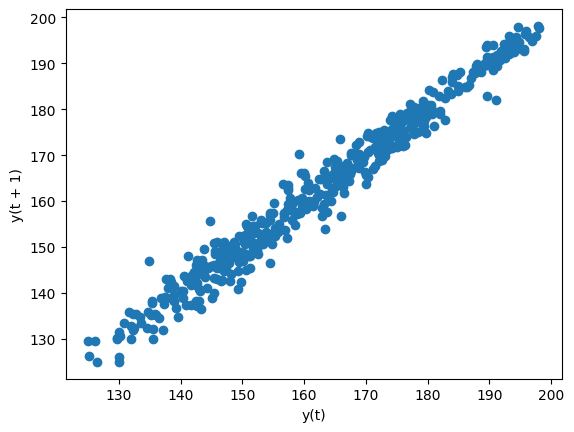

In [95]:
from pandas.plotting import lag_plot
plt.figure()
lag_plot(close['Price'], lag=1)

# Normality Tests

## Visual Normality Checks

### Histogram

(array([ 4.,  0.,  0.,  7.,  5.,  4.,  4.,  7.,  6., 11.,  6., 12., 13.,
        11., 13., 13., 15., 19., 11., 12., 12.,  9., 13., 12.,  6.,  9.,
        10., 20., 14., 11., 11., 10., 25., 20., 20., 13., 16., 10.,  8.,
         4.,  6.,  4.,  5.,  5., 16.,  7., 14.,  9.,  5.,  4.]),
 array([125.01999664, 126.48179672, 127.9435968 , 129.40539688,
        130.86719696, 132.32899704, 133.79079712, 135.2525972 ,
        136.71439728, 138.17619736, 139.63799744, 141.09979752,
        142.5615976 , 144.02339767, 145.48519775, 146.94699783,
        148.40879791, 149.87059799, 151.33239807, 152.79419815,
        154.25599823, 155.71779831, 157.17959839, 158.64139847,
        160.10319855, 161.56499863, 163.02679871, 164.48859879,
        165.95039886, 167.41219894, 168.87399902, 170.3357991 ,
        171.79759918, 173.25939926, 174.72119934, 176.18299942,
        177.6447995 , 179.10659958, 180.56839966, 182.03019974,
        183.49199982, 184.9537999 , 186.41559998, 187.87740005,
        189.

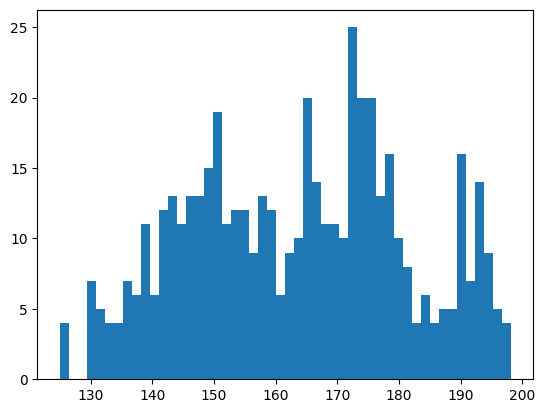

In [96]:
plt.hist(close['Price'], bins=50)

The distrubition does not display a classic bell curve shape. We can try to transform the data to a nepreian log scale to see if that helps.

In [97]:
# log of the price
close['lPrice'] = np.log(close['Price'])
close.head()

,Price,lPrice
Date,,
2022-01-03,182.009995,5.204062
2022-01-04,179.699997,5.191289
2022-01-05,174.919998,5.164329
2022-01-06,172.000000,5.147494
2022-01-07,172.169998,5.148482


(array([ 3.,  1.,  0.,  2.,  5.,  3.,  4.,  3.,  7.,  4.,  8.,  8.,  5.,
         8., 14.,  8., 14., 11., 16., 10., 18., 13., 11., 12., 10.,  9.,
        13.,  6., 10., 10., 23., 14.,  9., 12., 21., 22., 24., 13., 19.,
        12.,  7.,  7.,  5.,  5.,  6., 17., 11., 14.,  9.,  5.]),
 array([4.8284737 , 4.83768067, 4.84688765, 4.85609462, 4.8653016 ,
        4.87450857, 4.88371555, 4.89292252, 4.9021295 , 4.91133647,
        4.92054345, 4.92975042, 4.93895739, 4.94816437, 4.95737134,
        4.96657832, 4.97578529, 4.98499227, 4.99419924, 5.00340622,
        5.01261319, 5.02182017, 5.03102714, 5.04023412, 5.04944109,
        5.05864807, 5.06785504, 5.07706202, 5.08626899, 5.09547597,
        5.10468294, 5.11388991, 5.12309689, 5.13230386, 5.14151084,
        5.15071781, 5.15992479, 5.16913176, 5.17833874, 5.18754571,
        5.19675269, 5.20595966, 5.21516664, 5.22437361, 5.23358059,
        5.24278756, 5.25199454, 5.26120151, 5.27040849, 5.27961546,
        5.28882244]),
 <BarContainer

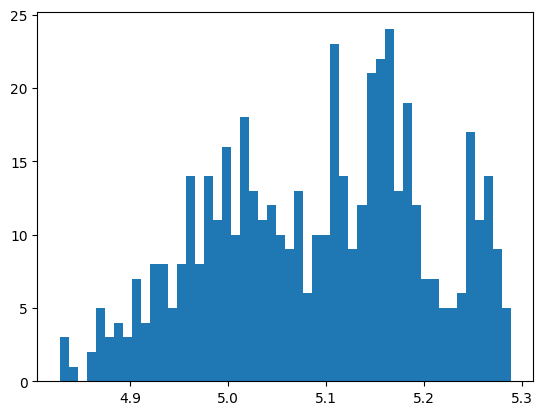

In [98]:
plt.hist(close['lPrice'], bins=50)

lPrice seems to be more normally distributed than Price. However, it is skewed to the right.

### QQ Plot

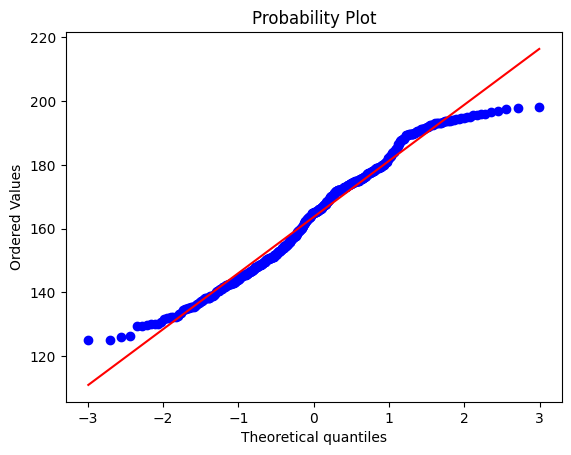

In [99]:
## qq plot of price
from scipy import stats

stats.probplot(close['Price'], dist="norm", plot=plt)
plt.show()

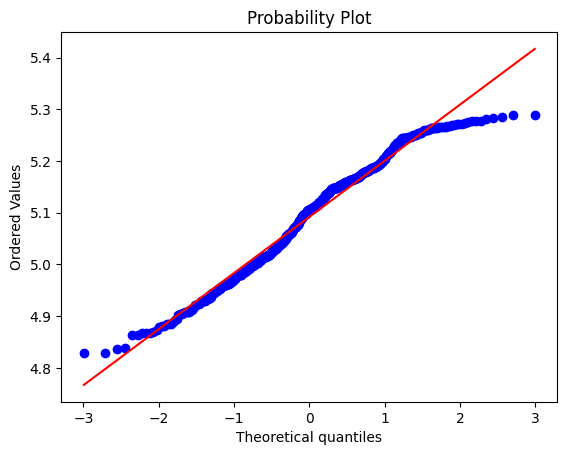

In [100]:
from scipy import stats

stats.probplot(close['lPrice'], dist="norm", plot=plt)
plt.show()

From the QQ plot, we can see that the data can be considered normal for the most part. However, there are some outliers that are skewing the data. 
We also conclude that the lPrice and Price are pretty much the same.

## Statistical Normality Tests

### Shapiro-Wilk Test

In [101]:
from scipy.stats import shapiro

stat, p = shapiro(close['Price'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.977, p=0.000


H0: The data is normally distributed
p-value: 0.0 < 0.05 => reject H0
The Shapiro-Wilk test rejects the null hypothesis that the data is normally distributed.

In [102]:
from scipy.stats import shapiro

stat, p = shapiro(close['lPrice'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.975, p=0.000


We find that also lPrice is not normally distributed through the Shapiro-Wilk test.

### Skewness and Kurtosis

In [103]:
# skewness and kurtosis
print("Skewness: %f" % close['Price'].skew())
print("Kurtosis: %f" % close['Price'].kurt())

Skewness: -0.013038
Kurtosis: -0.907887


Skewness is positive, which means that the data is skewed to the right. Kurtosis is negative, which means that the data is platykurtic.

### Kolmogorov-Smirnov Test

In [104]:
# kolmogorov-smirnov test
from scipy.stats import kstest

stat, p = kstest(close['Price'], 'norm')
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=1.000, p=0.000


In [105]:
from scipy.stats import kstest

stat, p = kstest(close['lPrice'], 'norm')
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=1.000, p=0.000


Kolmorogov-Smirnov test also rejects the null hypothesis that the data is normally distributed.

We will now transform the data using Square Root Transformation to see if that helps.

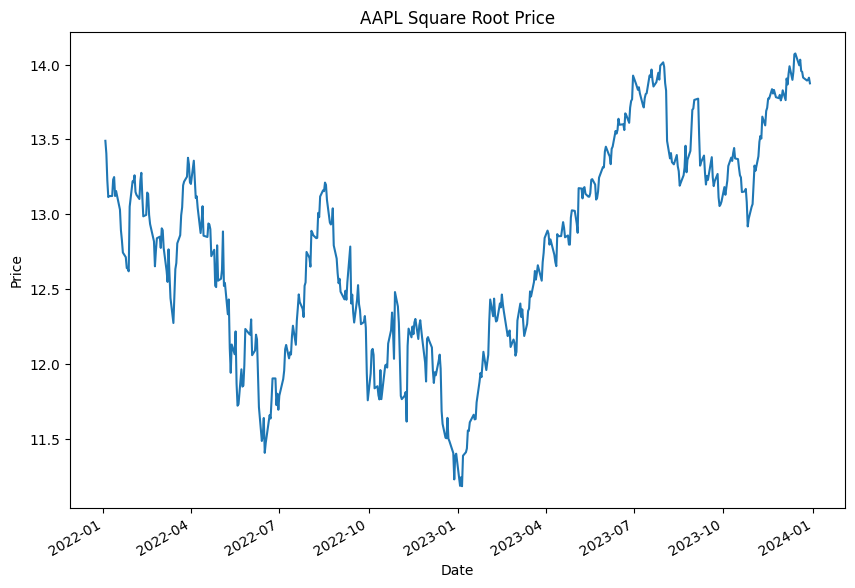

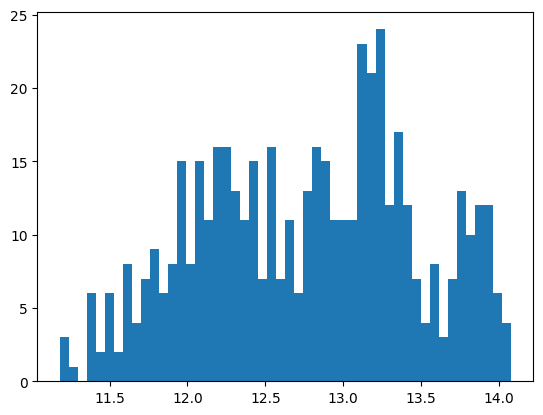

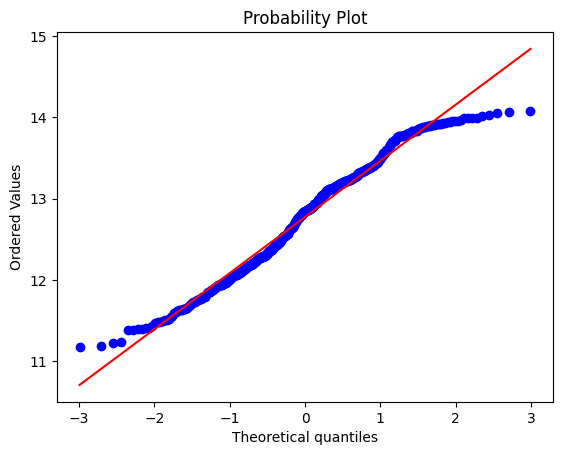

Statistics=0.977, p=0.000
Statistics=1.000, p=0.000


In [106]:
# transform the data using Square root and test for normality using visual and statistical methods
close['sqrtPrice'] = np.sqrt(close['Price'])

close['sqrtPrice'].plot(figsize=(10, 7), title=f"{stock} Square Root Price")
plt.ylabel("Price")
plt.show()

plt.hist(close['sqrtPrice'], bins=50)
plt.show()

stats.probplot(close['sqrtPrice'], dist="norm", plot=plt)
plt.show()

from scipy.stats import shapiro

stat, p = shapiro(close['sqrtPrice'])

print('Statistics=%.3f, p=%.3f' % (stat, p))

from scipy.stats import kstest
stat, p = kstest(close['sqrtPrice'], 'norm')
print('Statistics=%.3f, p=%.3f' % (stat, p))



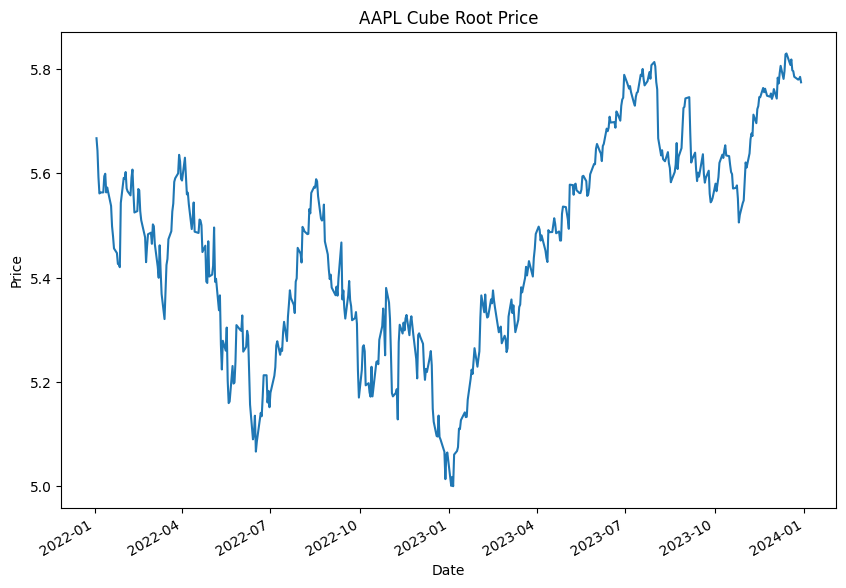

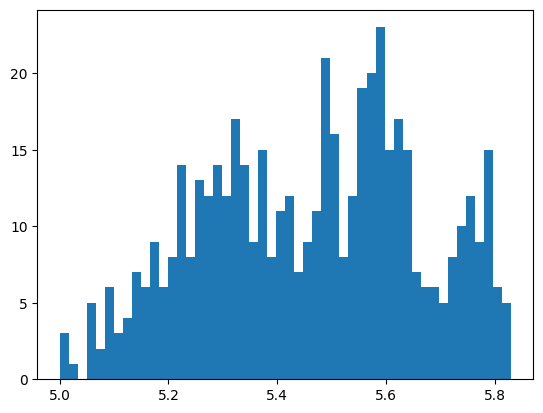

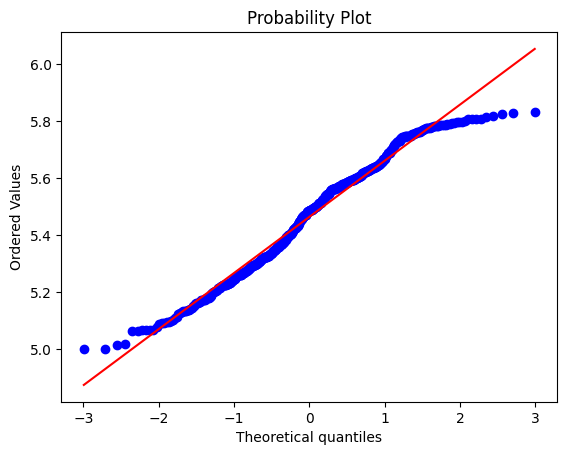

Statistics=0.976, p=0.000
Statistics=1.000, p=0.000


In [107]:
close['cbrtPrice'] = np.cbrt(close['Price'])

close['cbrtPrice'].plot(figsize=(10, 7), title=f"{stock} Cube Root Price")
plt.ylabel("Price")
plt.show()

plt.hist(close['cbrtPrice'], bins=50)
plt.show()

stats.probplot(close['cbrtPrice'], dist="norm", plot=plt)
plt.show()

stat, p = shapiro(close['cbrtPrice'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

stat, p = kstest(close['cbrtPrice'], 'norm')
print('Statistics=%.3f, p=%.3f' % (stat, p))

<font color='red'>All transformations failed to make the data normally distributed. We won't be using the transformed data.</font>

# Stationarity Tests

KPSS Test
H0: The data is stationary
p-value: 0.0 < 0.05 => reject H0

In [108]:
# KPSS test
from statsmodels.tsa.stattools import kpss

stat, p, lags, crit = kpss(close['Price'], 'c')
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=1.630, p=0.010


C:\Users\MSI\AppData\Local\Temp\ipykernel_10612\2978251272.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stat, p, lags, crit = kpss(close['Price'], 'c')


Data is not stationary. We will need to transform the data to make it stationary.

Differencing the data once to make it stationary.

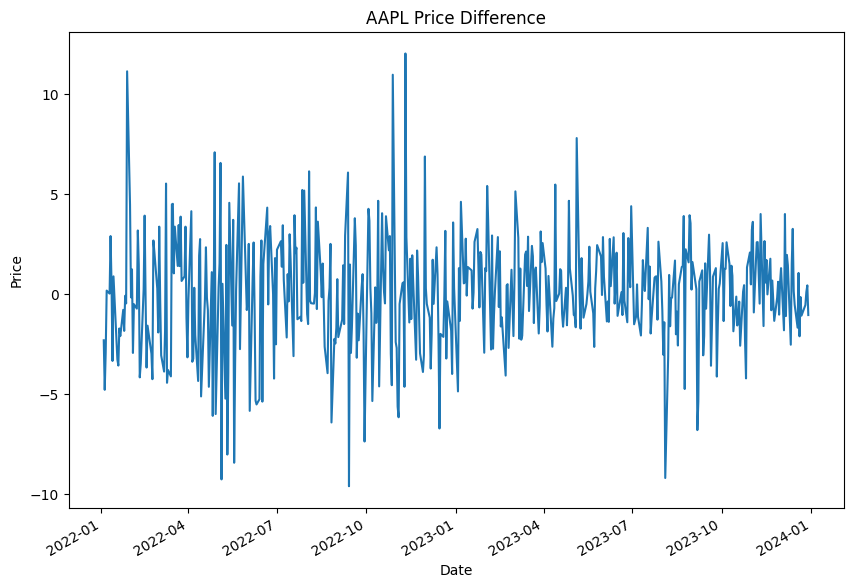

In [109]:
# difference the data
close['diff'] = close['Price'].diff().dropna()
close['diff'].plot(figsize=(10, 7), title=f"{stock} Price Difference")
plt.ylabel("Price")
plt.show()

<Axes: >

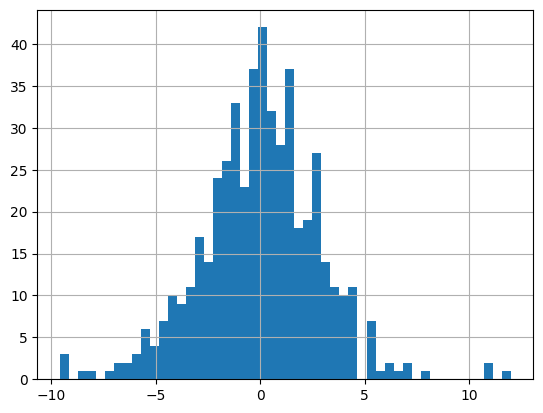

In [110]:
close['diff'].hist(bins=50)

In [111]:
close.head()

,Price,lPrice,sqrtPrice,cbrtPrice,diff
Date,,,,,
2022-01-03,182.009995,5.204062,13.491108,5.667155,NaN
2022-01-04,179.699997,5.191289,13.405223,5.643078,-2.309998
2022-01-05,174.919998,5.164329,13.225732,5.592592,-4.779999
2022-01-06,172.000000,5.147494,13.114877,5.561298,-2.919998
2022-01-07,172.169998,5.148482,13.121357,5.563129,0.169998


In [112]:
close = close.dropna()
stat, p, lags, crit = kpss(close['diff'], 'c')
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.212, p=0.100


C:\Users\MSI\AppData\Local\Temp\ipykernel_10612\284005713.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stat, p, lags, crit = kpss(close['diff'], 'c')


Data is now stationary and normally distributed.

In [113]:
# ADF test
from statsmodels.tsa.stattools import adfuller

result = adfuller(close["Price"], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

ADF Statistic: -1.548248563388708
n_lags: 0.5095229429636057
p-value: 0.5095229429636057
Critial Values:
   1%, -3.4435228622952065
Critial Values:
   5%, -2.867349510566146
Critial Values:
   10%, -2.569864247011056


The ADF test is non conclusive. The ADF statistic is greater than the critical values, however the p-value is greater than 0.05. Therefore, we cannot reject the null hypothesis that the data is non-stationary.

In [114]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(close["diff"], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

ADF Statistic: -16.719465397671122
n_lags: 1.4125533861848235e-29
p-value: 1.4125533861848235e-29
Critial Values:
   1%, -3.4435494520411605
Critial Values:
   5%, -2.8673612117611267
Critial Values:
   10%, -2.5698704830567247


The ADF test for the differenced data is conclusive. The ADF statistic is less than the critical values, and the p-value is less than 0.05. Therefore, we can reject the null hypothesis that the data is non-stationary.

# Model Selection

## ACF and PACF

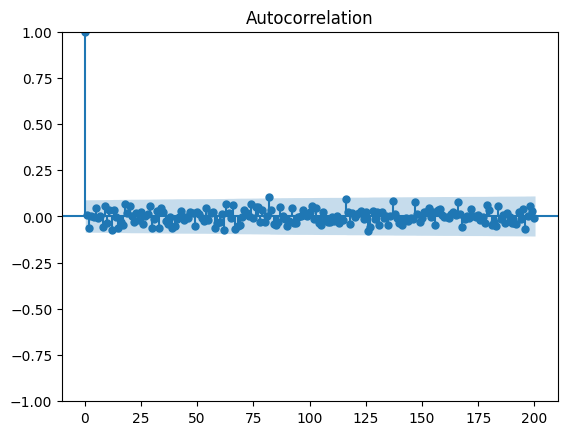

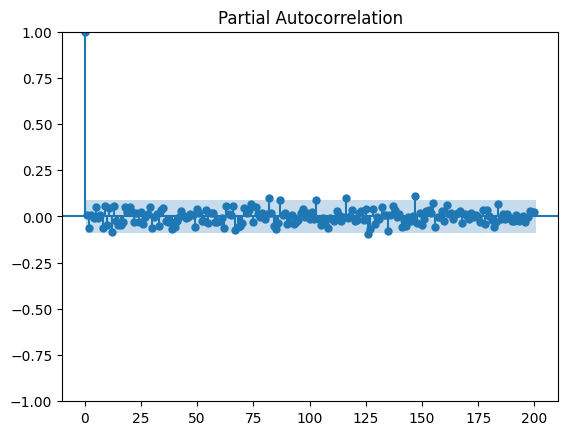

In [177]:
# ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(close['diff'], lags=200)
plt.show()

plot_pacf(close['diff'], lags=200)
plt.show()

The ACF and PACF plots suggest an ARIMA(1,1,0) model. The ACF plot shows a tailing off pattern, which suggests an AR model. The PACF plot displays a sharp cut off at lag 1, which suggests an AR(1) model.

In [116]:
close_=close.copy()

In [117]:
close_.head()

,Price,lPrice,sqrtPrice,cbrtPrice,diff
Date,,,,,
2022-01-04,179.699997,5.191289,13.405223,5.643078,-2.309998
2022-01-05,174.919998,5.164329,13.225732,5.592592,-4.779999
2022-01-06,172.000000,5.147494,13.114877,5.561298,-2.919998
2022-01-07,172.169998,5.148482,13.121357,5.563129,0.169998
2022-01-10,172.190002,5.148599,13.122119,5.563345,0.020004


In [118]:
# ARIMA model
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(close_['Price'], order=(1, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  500
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1231.085
Date:                Tue, 02 Jan 2024   AIC                           2466.170
Time:                        07:46:41   BIC                           2474.595
Sample:                             0   HQIC                          2469.476
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0077      0.041      0.186      0.852      -0.073       0.088
sigma2         8.1362      0.412     19.744      0.000       7.329       8.944
Ljung-Box (L1) (Q):                   0.00   Jarque-

e:\study\ITF 2\projet\notebook\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
e:\study\ITF 2\projet\notebook\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
e:\study\ITF 2\projet\notebook\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [178]:
p = 76
d=1
q=76

In [179]:
# ARIMA model
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(close_['Price'], order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())

e:\study\ITF 2\projet\notebook\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\study\ITF 2\projet\notebook\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
e:\study\ITF 2\projet\notebook\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  500
Model:               ARIMA(76, 1, 76)   Log Likelihood               -1161.017
Date:                Tue, 02 Jan 2024   AIC                           2628.034
Time:                        08:59:02   BIC                           3272.563
Sample:                             0   HQIC                          2880.968
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0493      0.753     -0.065      0.948      -1.525       1.426
ar.L2         -0.1693      0.707     -0.240      0.811      -1.555       1.216
ar.L3          0.3461      0.646      0.536      0.5

In [180]:
# auto arima
from pmdarima.arima import auto_arima

auto_model = auto_arima(close_['Price'], trace=True, error_action='ignore', suppress_warnings=True, stepwise=True, scoring='mse')
auto_model_fit=auto_model.fit(close_['Price'])
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2466.346, Time=0.86 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2466.158, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2468.130, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2468.126, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2464.199, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2463.238, Time=0.37 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2464.627, Time=0.62 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2464.594, Time=0.59 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2468.168, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2468.202, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2461.276, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2466.165, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2466.170, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2462.668, Time=0.30 sec
 ARIMA(1,1,2)(0,0,0)[0]          

Auto ARIMA suggests an ARIMA(0,1,0) model, however information indicatators show that there is no significant difference between the ARIMA(0,1,0) and ARIMA(1,1,0) models. The ar coefficient is also significant in the ARIMA(1,1,0) model, therefore we will use the ARIMA(1,1,0) model.
We also have to test the normality of the residuals to make sure that the model is a good fit.

## Model Evaluation

### Residuals

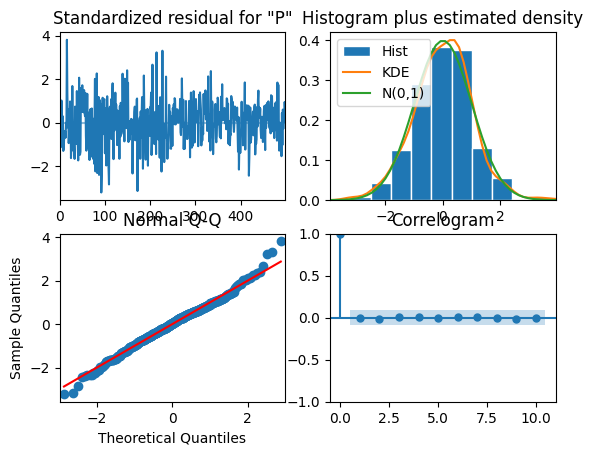

In [181]:
model_fit.plot_diagnostics()
plt.show()

In [182]:

test = model_fit.test_normality('jarquebera')
print('Test Statistic: %.2f, p-value: %.2f, Skew: %.2f, Kurtosis: %.2f' % (test[0][0], test[0][1], test[0][2], test[0][3]))

Test Statistic: 9.77, p-value: 0.01, Skew: -0.00, Kurtosis: 3.69


The p value of the Jarque-Bera test is less than 0.05, therefore we reject the null hypothesis that the residuals are normally distributed.

# Forecasting

In [183]:
close_ = close.copy()
close_.head()

,Price,lPrice,sqrtPrice,cbrtPrice,diff
Date,,,,,
2022-01-04,179.699997,5.191289,13.405223,5.643078,-2.309998
2022-01-05,174.919998,5.164329,13.225732,5.592592,-4.779999
2022-01-06,172.000000,5.147494,13.114877,5.561298,-2.919998
2022-01-07,172.169998,5.148482,13.121357,5.563129,0.169998
2022-01-10,172.190002,5.148599,13.122119,5.563345,0.020004


In [184]:
# split the data into train and test
close_ = close_.reset_index()
close_ = close_.drop(columns=['Date', 'lPrice', 'sqrtPrice', 'cbrtPrice', 'diff'])
train = close_.iloc[:int(close_.shape[0]*0.8)]
test = close_.iloc[int(close_.shape[0]*0.8):]

In [185]:
close_.shape[0], train.shape[0], test.shape[0]

(500, 400, 100)

In [186]:
model = ARIMA(train['Price'], order=(p, d, q))
model_fit = model.fit()
model_fit.summary()

e:\study\ITF 2\projet\notebook\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\study\ITF 2\projet\notebook\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


e:\study\ITF 2\projet\notebook\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  400
Model:               ARIMA(76, 1, 76)   Log Likelihood                -930.595
Date:                Tue, 02 Jan 2024   AIC                           2167.190
Time:                        09:42:46   BIC                           2777.501
Sample:                             0   HQIC                          2408.905
                                - 400                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0454      0.917     -0.049      0.961      -1.843       1.752
ar.L2          0.0203      0.811      0.025      0.980      -1.568       1.609
ar.L3          0.1006      0.778      0.129      0.897      -1.425       1.626
ar.L4         -0.1196      0.683     -0.175      0.861      -1.457       1.218
ar.L5          0.1705      0.732      0.233      0.816      -1.265       1.606
ar.L6          0.1972      0.661      0.298      0.765      -1.098       1.492
ar.L7          0.1729      0.669      0.258      0.796      -1.139       1.485
ar.L8          0.0053      0.659      0.008      0.994      -1.287       1.298
ar.L9          0.0313      0.592      0.053      0.958      -1.128       1.191
ar.L10        -0.3028      0.604     -0.501      0.616      -1.487       0.882
ar.L11        -0.0244      0.464     -0.053      0.958      -0.934       0.885
ar.L12        -0.1625      0.530     -0.307      0.759      -1.201       0.876
ar.L13         0.0038      0.515      0.007      0.994      -1.005       1.013
ar.L14        -0.2593      0.538     -0.482      0.630      -1.313       0.794
ar.L15        -0.0474      0.481     -0.098      0.922      -0.991       0.896
ar.L16         0.2025      0.445      0.455      0.649      -0.670       1.075
ar.L17         0.1806      0.410      0.440      0.660      -0.623       0.984
ar.L18        -0.1072      0.447     -0.240      0.810      -0.983       0.769
ar.L19         0.1036      0.475      0.218      0.827      -0.828       1.035
ar.L20         0.1656      0.384      0.432      0.666      -0.586       0.918
ar.L21         0.1616      0.413      0.391      0.696      -0.648       0.971
ar.L22        -0.1776      0.413     -0.430      0.667      -0.987       0.632
ar.L23        -0.0425      0.451     -0.094      0.925      -0.926       0.841
ar.L24        -0.0611      0.482     -0.127      0.899      -1.006       0.884
ar.L25         0.1430      0.417      0.343      0.732      -0.674       0.960
ar.L26        -0.0571      0.566     -0.101      0.920      -1.167       1.053
ar.L27         0.0419      0.452      0.093      0.926      -0.843       0.927
ar.L28        -0.1027      0.478     -0.215      0.830      -1.039       0.834
ar.L29         0.0434      0.396      0.110      0.913      -0.732       0.819
ar.L30        -0.0041      0.413     -0.010      0.992      -0.814       0.806
ar.L31         0.0466      0.395      0.118      0.906      -0.727       0.821
ar.L32        -0.0229      0.369     -0.062      0.950      -0.747       0.701
ar.L33        -0.0997      0.330     -0.302      0.763      -0.747       0.547
ar.L34         0.0977      0.324      0.301      0.763      -0.538       0.733
ar.L35         0.1602      0.325      0.494      0.622      -0.476       0.796
ar.L36        -0.0365      0.329     -0.111      0.912      -0.682       0.609
ar.L37         0.0651      0.297      0.219      0.827      -0.517       0.647
ar.L38         0.0260      0.281      0.093      0.926      -0.524       0.576
ar

H0 : No heteroskedasticiy. p-value = 0.61 > 0.05 => we reject H0, heteroskedasticity is possible.

In [187]:
steps = len(test) -1 + 100
prediction_results= model_fit.get_forecast(steps, alpha=0.05)  # 95% conf
fc = prediction_results.predicted_mean
conf = prediction_results.conf_int()
se = prediction_results.se_mean


e:\study\ITF 2\projet\notebook\.venv\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [188]:
conf

,lower Price,upper Price
400,177.359926,186.567242
401,176.957490,189.930398
402,174.623575,189.831945
403,171.280478,188.559745
404,169.958344,189.187496
...,...,...
594,123.162557,254.489872
595,121.774888,253.445280
596,121.513151,253.536226
597,121.051822,253.412302


In [189]:
test.head()

,Price
400,178.190002
401,177.970001
402,177.789993
403,179.460007
404,177.449997


In [190]:
fc_series = pd.Series(fc, index=test.index)
lower_series = conf['lower Price']
upper_series = conf['upper Price']

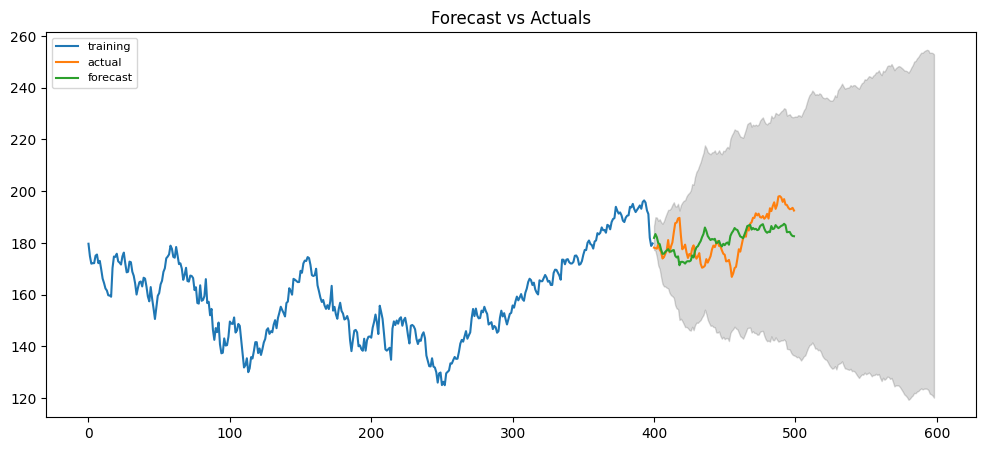

In [191]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

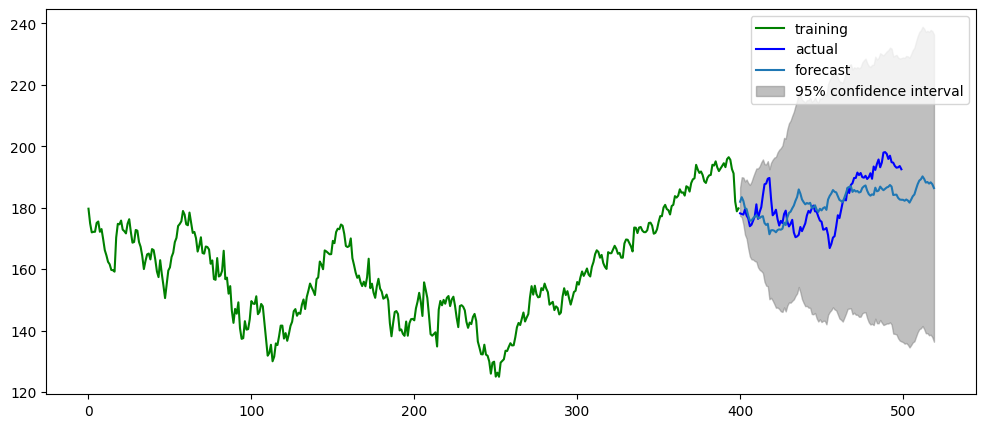

In [192]:
from statsmodels.graphics.tsaplots import plot_predict

fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(pd.DataFrame(train), '-g', label='training')
ax.plot(pd.DataFrame(test), '-b', label='actual')


plot_predict(model_fit, start=test.index[0], end=test.index[-1]+20, ax=ax);

In [193]:
model_fit.params

ar.L1    -0.045369
ar.L2     0.020296
ar.L3     0.100569
ar.L4    -0.119575
ar.L5     0.170461
            ...   
ma.L73   -0.232966
ma.L74   -0.170524
ma.L75    0.410303
ma.L76   -0.063638
sigma2    5.098969
Length: 153, dtype: float64

### Evaluation

In [194]:
# evaluate the model
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test['Price'], fc_series)
print('MSE: '+str(mse))

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test['Price'], fc_series)
print('MAE: '+str(mae))

from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(test['Price'], fc_series)
print('MAPE: '+str(mape))


MSE: 57.99267654239419
MAE: 6.16601698973931
MAPE: 0.03381407892463448


In [195]:
from pmdarima.arima import auto_arima

auto_model = auto_arima(close_['Price'], trace=True, error_action='ignore', suppress_warnings=True, stepwise=True, scoring='mse', seasonal=True)
auto_model_fit=auto_model.fit(train['Price'])
print(auto_model.summary())

Performing stepwise search to minimize aic


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2466.346, Time=0.87 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2466.158, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2468.130, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2468.126, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2464.199, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2463.238, Time=0.37 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2464.627, Time=0.61 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2464.594, Time=0.59 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2468.168, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2468.202, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2461.276, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2466.165, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2466.170, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2462.668, Time=0.30 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2462.636, Time=0.31 sec
 ARIMA(0,1

In [196]:
# plot auto arima forecast
nb_periods = len(test)+100
fc, confint = auto_model.predict(n_periods=nb_periods, return_conf_int=True)


In [197]:

# make series for plotting purpose
fc_series = fc
lower_series = pd.Series(confint[:, 0], index=fc.index)
upper_series = pd.Series(confint[:, 1], index=fc.index)

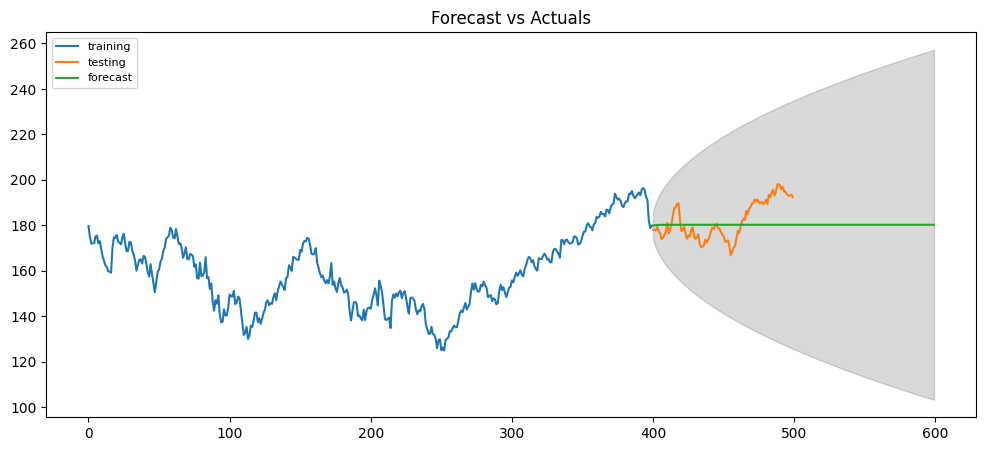

In [198]:

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train['Price'], label='training')
plt.plot(test['Price'], label='testing')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


In [199]:

fc_series = pd.Series(fc, index=test.index)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test['Price'], fc_series)
print('MSE: '+str(mse))

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test['Price'], fc_series)
print('MAE: '+str(mae))

from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(test['Price'], fc_series)
print('MAPE: '+str(mape))



MSE: 73.06069845233598
MAE: 7.161789140540439
MAPE: 0.03872216882672877


In [200]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  400
Model:               ARIMA(76, 1, 76)   Log Likelihood                -930.595
Date:                Tue, 02 Jan 2024   AIC                           2167.190
Time:                        09:42:52   BIC                           2777.501
Sample:                             0   HQIC                          2408.905
                                - 400                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0454      0.917     -0.049      0.961      -1.843       1.752
ar.L2          0.0203      0.811      0.025      0.980      -1.568       1.609
ar.L3          0.1006      0.778      0.129      0.897      -1.425       1.626
ar.L4         -0.1196      0.683     -0.175      0.861      -1.457       1.218
ar.L5          0.1705      0.732      0.233      0.816      -1.265       1.606
ar.L6          0.1972      0.661      0.298      0.765      -1.098       1.492
ar.L7          0.1729      0.669      0.258      0.796      -1.139       1.485
ar.L8          0.0053      0.659      0.008      0.994      -1.287       1.298
ar.L9          0.0313      0.592      0.053      0.958      -1.128       1.191
ar.L10        -0.3028      0.604     -0.501      0.616      -1.487       0.882
ar.L11        -0.0244      0.464     -0.053      0.958      -0.934       0.885
ar.L12        -0.1625      0.530     -0.307      0.759      -1.201       0.876
ar.L13         0.0038      0.515      0.007      0.994      -1.005       1.013
ar.L14        -0.2593      0.538     -0.482      0.630      -1.313       0.794
ar.L15        -0.0474      0.481     -0.098      0.922      -0.991       0.896
ar.L16         0.2025      0.445      0.455      0.649      -0.670       1.075
ar.L17         0.1806      0.410      0.440      0.660      -0.623       0.984
ar.L18        -0.1072      0.447     -0.240      0.810      -0.983       0.769
ar.L19         0.1036      0.475      0.218      0.827      -0.828       1.035
ar.L20         0.1656      0.384      0.432      0.666      -0.586       0.918
ar.L21         0.1616      0.413      0.391      0.696      -0.648       0.971
ar.L22        -0.1776      0.413     -0.430      0.667      -0.987       0.632
ar.L23        -0.0425      0.451     -0.094      0.925      -0.926       0.841
ar.L24        -0.0611      0.482     -0.127      0.899      -1.006       0.884
ar.L25         0.1430      0.417      0.343      0.732      -0.674       0.960
ar.L26        -0.0571      0.566     -0.101      0.920      -1.167       1.053
ar.L27         0.0419      0.452      0.093      0.926      -0.843       0.927
ar.L28        -0.1027      0.478     -0.215      0.830      -1.039       0.834
ar.L29         0.0434      0.396      0.110      0.913      -0.732       0.819
ar.L30        -0.0041      0.413     -0.010      0.992      -0.814       0.806
ar.L31         0.0466      0.395      0.118      0.906      -0.727       0.821
ar.L32        -0.0229      0.369     -0.062      0.950      -0.747       0.701
ar.L33        -0.0997      0.330     -0.302      0.763      -0.747       0.547
ar.L34         0.0977      0.324      0.301      0.763      -0.538       0.733
ar.L35         0.1602      0.325      0.494      0.622      -0.476       0.796
ar.L36        -0.0365      0.329     -0.111      0.912      -0.682       0.609
ar.L37         0.0651      0.297      0.219      0.827      -0.517       0.647
ar.L38         0.0260      0.281      0.093      0.926      -0.524       0.576
ar

In [201]:
auto_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  400
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1005.928
Date:                Tue, 02 Jan 2024   AIC                           2017.857
Time:                        09:42:53   BIC                           2029.823
Sample:                             0   HQIC                          2022.596
                                - 400                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6344      0.676      0.939      0.348      -0.690       1.959
ma.L1         -0.6634      0.659     -1.006      0.314      -1.956       0.629
sigma2         9.0643      0.531     17.084      0.000       8.024      10.104
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                25.64
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               0.41   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Auto arima suggests an ARIMA(0,1,0) model. This result indicates a random walk model. The AIC and BIC values are also very high, which indicates that the model is not a good fit. The residuals are also not normally distributed. Therefore, we can conclude that forecasting using ARIMA is not a good idea. The stock price does not display a trend, and is very volatile.